# Exploratory Data Analysis and Preparations

### Importing Required Libraries

In [60]:
#mount drive to access data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import re

from scipy.stats import norm
import statistics
import scipy.stats as stats
from matplotlib.pyplot import figure


import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as py

%matplotlib inline

import itertools

import warnings
warnings.simplefilter(action='ignore', category=Warning)

### Loading in the Data

In [62]:
#Loading in the csv file
df_soccer =pd.read_csv('/content/drive/Shareddrives/MADS 599 Capstone!!!/Soccer'
+ ' Dataset/fifa_data.csv')

In [63]:
df_soccer.head()

,ID,Name,Position,Age,Overall,Potential,Team,Value,Wage,Total_Point,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,weak_foot,skill_move,international_reputation,work_rate,body_type
0,261188,I. Ndiaye,CAM,22,71,81,Sheffield United,€4.2M,€16K,1699,...,9,7,15,8,Preferred FootRight,3 Weak Foot,4 Skill Moves,1 International Reputation,Work RateMedium/ High,Body TypeLean (170-185)
1,240833,Y. Moukoko,ST,17,71,89,Borussia Dortmund,€4.7M,€6K,1754,...,13,11,10,13,Preferred FootLeft,4 Weak Foot,4 Skill Moves,1 International Reputation,Work RateMedium/ Low,Body TypeNormal (170-185)
2,183569,E. Choupo-Moting,ST,33,75,75,FC Bayern München,€3.6M,€50K,1831,...,9,9,16,6,Preferred FootRight,4 Weak Foot,3 Skill Moves,2 International Reputation,Work RateHigh/ Medium,Body TypeNormal (185+)
3,236524,A. Ahmedhodžić,CB,23,72,82,Sheffield United,€4.9M,€16K,1706,...,10,8,11,9,Preferred FootRight,3 Weak Foot,2 Skill Moves,1 International Reputation,Work RateMedium/ Medium,Body TypeLean (185+)
4,256790,J. Musiala,CAM,19,82,91,FC Bayern München,€66M,€43K,2011,...,9,8,8,11,Preferred FootRight,4 Weak Foot,5 Skill Moves,1 International Reputation,Work RateMedium/ Medium,Body TypeLean (170-185)


### Data Cleaning

In [64]:
#getting the information of our data
df_soccer.describe()

,ID,Age,Overall,Potential,Total_Point,crossing,finishing,heading_accuracy,short_passing,volleys,...,penalties,composure,defensive_awareness,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,20100.000000,20100.000000,20100.000000,20100.000000,20100.000000,20100.000000,20100.000000,20100.000000,20100.000000,20059.000000,...,20059.000000,19867.000000,20100.00000,20100.000000,20059.000000,20100.000000,20100.000000,20100.000000,20100.000000,20100.000000
mean,247491.358259,22.985821,63.012338,70.645871,1530.688806,46.893383,44.414279,49.667463,56.434478,40.696944,...,46.783190,54.334676,42.96602,45.626119,43.785732,15.693134,15.506020,15.468358,15.441443,15.742040
std,29846.685160,4.551265,7.937530,6.543875,285.022043,17.619278,19.704112,16.820534,14.872131,17.363959,...,15.784592,12.987537,20.18013,20.827158,20.238003,16.322194,15.829415,15.696590,15.731598,16.647368
min,41.000000,15.000000,38.000000,40.000000,749.000000,6.000000,3.000000,5.000000,10.000000,3.000000,...,6.000000,13.000000,3.00000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,245278.000000,20.000000,57.000000,66.000000,1384.000000,35.000000,29.000000,42.000000,50.000000,29.000000,...,38.000000,45.000000,25.00000,26.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,256050.500000,22.000000,62.000000,70.000000,1540.500000,49.000000,48.000000,52.000000,59.000000,41.000000,...,48.000000,54.000000,46.00000,51.000000,49.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,263043.250000,25.000000,68.000000,75.000000,1715.000000,60.000000,60.000000,61.000000,66.000000,53.000000,...,58.000000,63.000000,59.00000,63.000000,61.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,272427.000000,49.000000,91.000000,95.000000,2312.000000,94.000000,94.000000,93.000000,93.000000,90.000000,...,94.000000,96.000000,94.00000,91.000000,87.000000,90.000000,90.000000,93.000000,90.000000,90.000000


In [65]:
df_soccer.info() #Weight, height, Value, and Wage should be integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        20100 non-null  int64  
 1   Name                      20100 non-null  object 
 2   Position                  20100 non-null  object 
 3   Age                       20100 non-null  int64  
 4   Overall                   20100 non-null  int64  
 5   Potential                 20100 non-null  int64  
 6   Team                      19852 non-null  object 
 7   Value                     20100 non-null  object 
 8   Wage                      20100 non-null  object 
 9   Total_Point               20100 non-null  int64  
 10  height                    20100 non-null  object 
 11  weight                    20100 non-null  object 
 12  crossing                  20100 non-null  int64  
 13  finishing                 20100 non-null  int64  
 14  headin

In [66]:
#removing duplicates
df_soccer = df_soccer.drop_duplicates()

In [67]:
#Checking for missing values
df_soccer.isnull().sum()

ID                            0
Name                          0
Position                      0
Age                           0
Overall                       0
Potential                     0
Team                        211
Value                         0
Wage                          0
Total_Point                   0
height                        0
weight                        0
crossing                      0
finishing                     0
heading_accuracy              0
short_passing                 0
volleys                      33
acceleration                  0
sprint_speed                  0
agility                       0
reactions                    33
balance                      33
dribbling                     0
curve                         0
fk_accuracy                   0
long_passing                  0
ball_control                 33
shot_power                    0
jumping                       0
stamina                       0
strength                      0
long_sho

Columns with missing values: Team, volleys, reactions, balance, ball_controll, long_shots, penalties, composure and sliding tackle

In [68]:
#Creating function to clean weight and height
def clean_height(x):
  if isinstance(x, str):
    return(x.replace('cm', ''))
  return(x)

df_soccer['height'] = df_soccer['height'].apply(clean_height).astype('float')

def clean_weight(x):
  if isinstance(x, str):
    return(x.replace('kg', ''))
  return(x)

df_soccer['weight'] = df_soccer['weight'].apply(clean_weight).astype('float')

In [69]:
#Creating position categories
mapping = {'ST':'Forward', 'RW':'Forward', 'LW':'Forward', 'CF':'Forward',
           'RM':'Midfield', 'CM': 'Midfield', 'LM':'Midfield', 'CAM':'Midfield', 'CDM':'Midfield',
           'LB':'Defender', 'CB':'Defender', 'RB':'Defender', 'LWB':'Defender', 'RWB':'Defender',
           'GK':'Goalkeeper'}

for index, row in df_soccer.iterrows():
  df_soccer.loc[index, 'Position_Category'] = mapping[row['Position']]

In [70]:
#Function for converting string values into numbers
def value_wage_conversion(value):
  if isinstance(value, str):
    out = value.replace('€','')
    #values in millions
    if 'M' in out:
      out = float(out.replace('M', ''))*1000000
    #values in Thousands
    elif 'K' in out:
      out = float(out.replace('K', ''))*1000
    return float(out)

df_soccer['Value'] = df_soccer['Value'].apply(lambda x: value_wage_conversion(x))
df_soccer['Wage'] = df_soccer['Wage'].apply(lambda x: value_wage_conversion(x))

In [71]:
#Getting total player positions
df_soccer['Position'].value_counts()

CB     2852
ST     2588
CM     2241
GK     1913
CDM    1360
RB     1116
CAM    1088
LB     1084
RM      933
LM      903
RW      549
LW      476
RWB     215
LWB     200
CF      131
Name: Position, dtype: int64

In [72]:
#Counting players position categories
df_soccer['Position_Category'].value_counts()

Midfield      6525
Defender      5467
Forward       3744
Goalkeeper    1913
Name: Position_Category, dtype: int64

In [73]:
#looking at change column values
changed_columns = df_soccer[['Name', 'Value', 'Wage', 'height', 'weight', 'Position_Category']]
changed_columns.head()

,Name,Value,Wage,height,weight,Position_Category
0,I. Ndiaye,4200000.0,16000.0,180.0,70.0,Midfield
1,Y. Moukoko,4700000.0,6000.0,175.0,73.0,Forward
2,E. Choupo-Moting,3600000.0,50000.0,191.0,90.0,Forward
3,A. Ahmedhodžić,4900000.0,16000.0,195.0,84.0,Defender
4,J. Musiala,66000000.0,43000.0,184.0,72.0,Midfield


In [74]:
# Extract all the letters from skill_move column
#remove all spaces from the skill move column
df_soccer['skill_move'].str.replace(r'\W', '')
# remove the letters 
df_soccer['skill_move'] = df_soccer['skill_move'].str.extract(r'(\d)')

In [75]:
# Extract all letters from the international column
#remove all spaces from the skill move column
df_soccer['international_reputation'].str.replace(r'\W', '')
# remove the letters 
df_soccer['international_reputation'] = df_soccer['international_reputation'].str.extract(r'(\d)')

In [76]:
# Extract all letters from the Work rate column
#remove all spaces from the skill move column
df_soccer['work_rate'].str.replace(r'\W', '')
# remove the letters 
df_soccer['work_rate'] = df_soccer['work_rate'].str.replace('Work Rate', '')

In [77]:
df_soccer.head()

,ID,Name,Position,Age,Overall,Potential,Team,Value,Wage,Total_Point,...,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,weak_foot,skill_move,international_reputation,work_rate,body_type,Position_Category
0,261188,I. Ndiaye,CAM,22,71,81,Sheffield United,4200000.0,16000.0,1699,...,7,15,8,Preferred FootRight,3 Weak Foot,4,1,Medium/ High,Body TypeLean (170-185),Midfield
1,240833,Y. Moukoko,ST,17,71,89,Borussia Dortmund,4700000.0,6000.0,1754,...,11,10,13,Preferred FootLeft,4 Weak Foot,4,1,Medium/ Low,Body TypeNormal (170-185),Forward
2,183569,E. Choupo-Moting,ST,33,75,75,FC Bayern München,3600000.0,50000.0,1831,...,9,16,6,Preferred FootRight,4 Weak Foot,3,2,High/ Medium,Body TypeNormal (185+),Forward
3,236524,A. Ahmedhodžić,CB,23,72,82,Sheffield United,4900000.0,16000.0,1706,...,8,11,9,Preferred FootRight,3 Weak Foot,2,1,Medium/ Medium,Body TypeLean (185+),Defender
4,256790,J. Musiala,CAM,19,82,91,FC Bayern München,66000000.0,43000.0,2011,...,8,8,11,Preferred FootRight,4 Weak Foot,5,1,Medium/ Medium,Body TypeLean (170-185),Midfield


In [78]:
# Extract all letters from the Body type
#remove all spaces from the body type column
df_soccer['body_type'].str.replace(r'\W', '')
# remove the letters 
df_soccer['body_type'] = df_soccer['body_type'].str.replace('Body Type', '')

In [79]:
# Extract all letters from the Preferred foot column
#remove all spaces from the preferred foot column
df_soccer['preferred_foot'].str.replace(r'\W', '')
# remove the letters 
df_soccer['preferred_foot'] = df_soccer['preferred_foot'].str.replace('Preferred Foot', '')

In [80]:
# Extract numbers from weak_foot using regex

#remove all spaces from the skill move column
df_soccer['weak_foot'].str.replace(r'\W', '')
# remove the letters 
df_soccer['weak_foot'] = df_soccer['weak_foot'].str.extract(r'(\d)')

In [81]:
df_soccer['Age'] = df_soccer['Age'].apply(pd.to_numeric, downcast='float', errors='coerce')
df_soccer['weak_foot'] = df_soccer['weak_foot'].apply(pd.to_numeric, downcast='float', errors='coerce')
df_soccer['international_reputation'] = df_soccer['international_reputation'].apply(pd.to_numeric, downcast='float', errors='coerce')
df_soccer['skill_move'] = df_soccer['skill_move'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [82]:
df_soccer.head()

,ID,Name,Position,Age,Overall,Potential,Team,Value,Wage,Total_Point,...,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,weak_foot,skill_move,international_reputation,work_rate,body_type,Position_Category
0,261188,I. Ndiaye,CAM,22,71,81,Sheffield United,4200000.0,16000.0,1699,...,7,15,8,Right,3.0,4.0,1.0,Medium/ High,Lean (170-185),Midfield
1,240833,Y. Moukoko,ST,17,71,89,Borussia Dortmund,4700000.0,6000.0,1754,...,11,10,13,Left,4.0,4.0,1.0,Medium/ Low,Normal (170-185),Forward
2,183569,E. Choupo-Moting,ST,33,75,75,FC Bayern München,3600000.0,50000.0,1831,...,9,16,6,Right,4.0,3.0,2.0,High/ Medium,Normal (185+),Forward
3,236524,A. Ahmedhodžić,CB,23,72,82,Sheffield United,4900000.0,16000.0,1706,...,8,11,9,Right,3.0,2.0,1.0,Medium/ Medium,Lean (185+),Defender
4,256790,J. Musiala,CAM,19,82,91,FC Bayern München,66000000.0,43000.0,2011,...,8,8,11,Right,4.0,5.0,1.0,Medium/ Medium,Lean (170-185),Midfield


### Exploratory Data Analysis

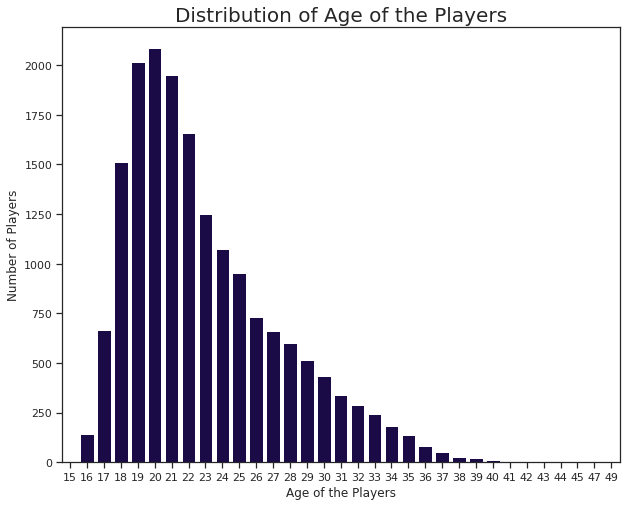

In [83]:
#distribution of age for each players
x = df_soccer['Age']
plt.figure(figsize=(10,8))
ax = sns.countplot(x, color = '#150050')
ax.set_xlabel(xlabel = 'Age of the Players')
ax.set_ylabel(ylabel = 'Number of Players')
ax.set_title(label = 'Distribution of Age of the Players', fontsize = 20)
plt.show()

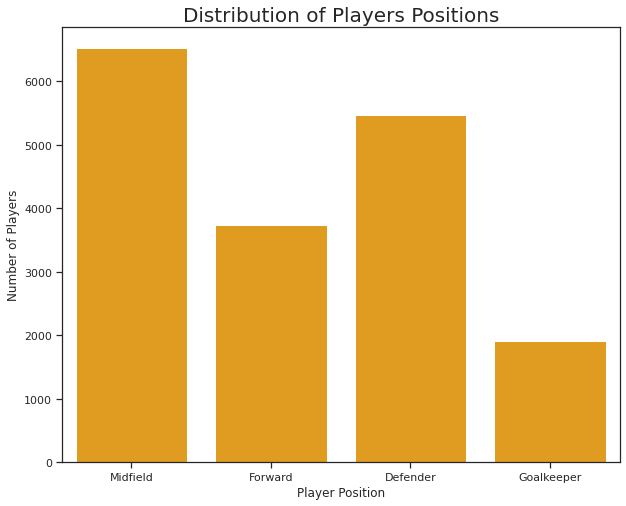

In [84]:
#distribution of position category
x = df_soccer['Position_Category']
plt.figure(figsize=(10,8))
ax = sns.countplot(x, color = 'orange')
ax.set_xlabel(xlabel = 'Player Position')
ax.set_ylabel(ylabel = 'Number of Players')
ax.set_title(label = 'Distribution of Players Positions', fontsize = 20)
plt.show()

In [85]:
df_soccer.groupby('Position_Category').mean(numeric_only = True)

,ID,Age,Overall,Potential,Value,Wage,Total_Point,height,weight,crossing,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,weak_foot,skill_move,international_reputation
Position_Category,,,,,,,,,,,,,,,,,,,,,
Defender,248321.932504,23.164807,63.003841,70.327785,2.228465e+06,6982.815072,1534.701116,182.316627,75.487287,47.870496,...,63.559356,61.762690,10.238522,10.158954,10.232486,10.127126,10.099323,2.755808,2.150357,1.075544
Forward,247621.039263,22.867521,63.101496,70.732372,3.004256e+06,8961.338141,1568.868590,180.429487,74.118590,48.283654,...,26.749733,24.632156,10.156517,10.186165,10.267628,10.238782,10.192308,3.055556,2.598825,1.107906
Goalkeeper,249279.495557,22.998955,60.405646,68.840565,1.586273e+06,4564.662833,965.499216,187.903293,80.141140,12.993204,...,12.901725,12.954498,61.055410,59.510716,58.734971,58.892316,61.944590,2.439624,1.000000,1.071615
Midfield,248163.691954,22.769808,62.808123,70.543142,2.596410e+06,7243.578544,1647.646130,177.716169,71.338084,54.171954,...,50.304828,48.181748,10.134866,10.155709,10.210421,10.141916,10.120766,3.017471,2.557395,1.085364


In [86]:
df_soccer.agg({
    'Age': ['min', 'max', 'median', 'mean']
})

,Age
min,15.00000
max,49.00000
median,22.00000
mean,22.93773


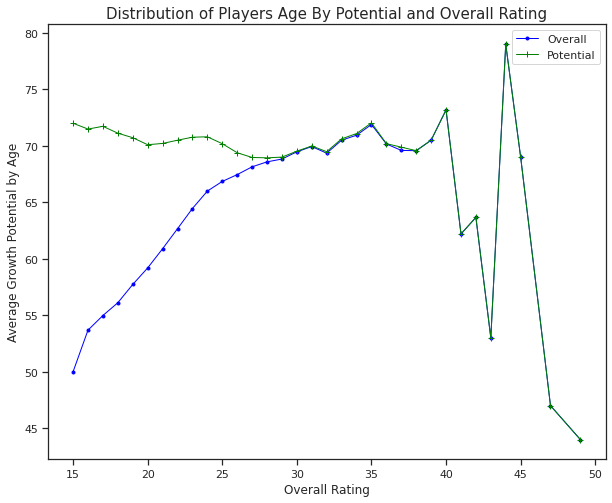

In [87]:
#Distribution of players' Age By Potential and Overall Rating
overall = pd.DataFrame(df_soccer.groupby(['Age'])['Overall'].mean())
potential = pd.DataFrame(df_soccer.groupby(['Age'])['Potential'].mean())

merged = pd.merge(overall, potential, on = 'Age', how = 'inner')
merged['Age'] = merged.index

fig, ax = plt.subplots(figsize=(10,8))

merged.reset_index(drop = True, inplace = True)

plt.plot('Age', 'Overall', data = merged, marker = '.', color = 'blue', lw = 1, label = 'Overall')
plt.plot('Age', 'Potential', data = merged, marker = '+', color = 'green', lw = 1, label = 'Potential')
plt.xlabel('Overall Rating')
plt.ylabel('Average Growth Potential by Age')
ax.set_title(label = 'Distribution of Players Age By Potential and Overall Rating', fontsize = 15)
plt.legend()

**The youngest and eldest player from the sample football data is 15 and 49 years old. Positions by category appear to be skewed to the right, impying our data is not normally distributed. The mean and median age are 23 and 22 years rounding to the nearest tenth.**

 **The distribution of players Age By Potential and Overall Rating plot shows the average growth potential of a player increases by Age but as the player gets older the rating declines. We can also conclude that between the age of 30 and 37 players reach there maximum potential before they start to decline due to old age.** 

In [88]:
#Top 10 teams with highest player'a average value
team = df_soccer.groupby('Team')['Value'].mean().reset_index().sort_values(
    'Value', ascending = True).tail(10)
fig = px.bar(team, x="Value", y="Team", orientation='h', title = 'Top 10 Teams with Highest Players Average Value')
fig.show()

In [89]:
#Top 10 teams with the highest player's average overall rating
team = df_soccer.groupby('Team')['Overall'].mean().reset_index().sort_values(
    'Overall', ascending = True).tail(10)
fig = px.bar(team, x = 'Overall', y = 'Team', orientation = 'h', title = 'Top 10 Teams with Highest Players Average Overall Rating')
fig.show()

In [90]:
#Top 10 teams with highest player's average wage
team = df_soccer.groupby('Team')['Wage'].mean().reset_index().sort_values('Wage', ascending = True).tail(10)
fig = px.bar(team, x="Wage", y="Team", orientation='h', title = 'Top 10 Teams with Highest Players Average Wage')
fig.show()

In [91]:
#Top 10 teams with highest players average total stats points
team = df_soccer.groupby('Team')['Total_Point'].mean().reset_index().sort_values('Total_Point', ascending=True).tail(10)
fig = px.bar(team, x="Total_Point", y="Team", orientation='h', 
             title = 'Top 10 Teams with Highest Players Average Total Stats Points')
fig.show()

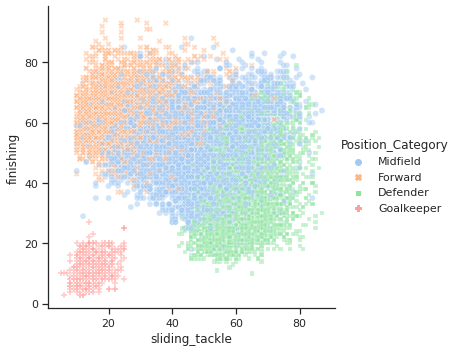

In [92]:
#finishing vs sliding_tackle. Checking to see how stats for finishing and sliding tackle is distributed among positions
sns.relplot(x = "sliding_tackle", 
                y = "finishing", 
                hue = "Position_Category", 
                kind = "scatter", 
                style = 'Position_Category',
                data = df_soccer[(df_soccer['Position_Category']=='Midfield') | (df_soccer['Position_Category']=='Defender') | 
                        (df_soccer['Position_Category']=='Forward') | (df_soccer['Position_Category']=='Goalkeeper')], 
                alpha = 0.5)


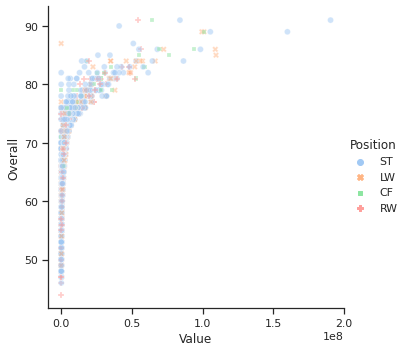

In [93]:
#Looking at which forwards has the highest value
sns.relplot(x = "Value", 
                y = "Overall", 
                hue = "Position", 
                kind = "scatter", 
                style = 'Position',
                data = df_soccer[(df_soccer['Position']=='ST') | (df_soccer['Position']=='RW') | 
                        (df_soccer['Position']=='LW') | (df_soccer['Position']=='CF')], 
                alpha = 0.5)

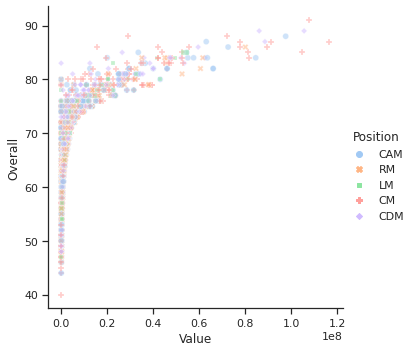

In [94]:
#Looking at which midielders has the highest value
sns.relplot(x = "Value", 
                y = "Overall", 
                hue = "Position", 
                kind = "scatter", 
                style = 'Position',
                data = df_soccer[(df_soccer['Position']=='CM') | (df_soccer['Position']=='RM') | 
                        (df_soccer['Position']=='LM') | (df_soccer['Position']=='CAM') | (df_soccer['Position']=='CDM')], 
                alpha = 0.5)

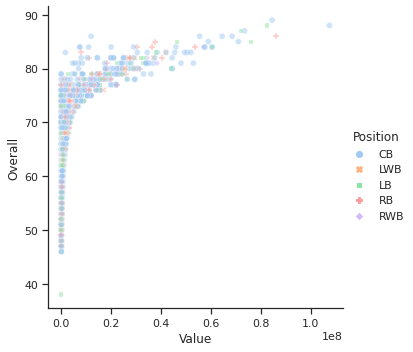

In [95]:
#Looking at which Defender has the highest value
sns.relplot(x = "Value", 
                y = "Overall", 
                hue = "Position", 
                kind = "scatter", 
                style = 'Position',
                data = df_soccer[(df_soccer['Position']=='LB') | (df_soccer['Position']=='CB') | 
                        (df_soccer['Position']=='RB') | (df_soccer['Position']=='LWB') | (df_soccer['Position']=='RWB')], 
                alpha = 0.5)

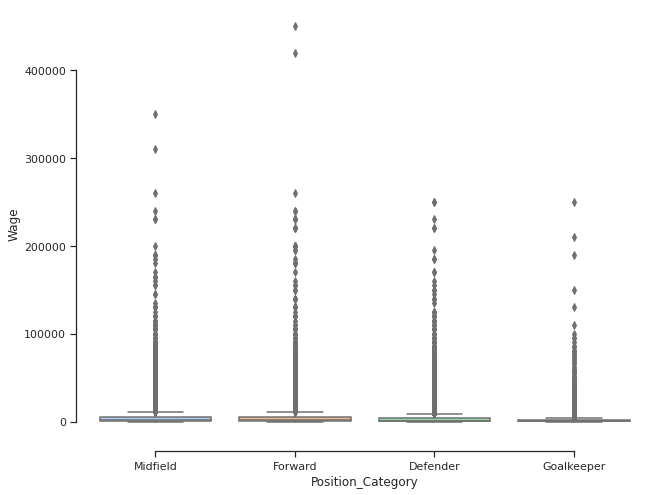

In [96]:
#Checking for outliers for each position category base on wage each player makes
sns.set(style="ticks", palette="pastel")
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)

box1 = sns.boxplot(data = df_soccer, y = 'Wage', x = 'Position_Category')
sns.despine(offset=10, trim=True)

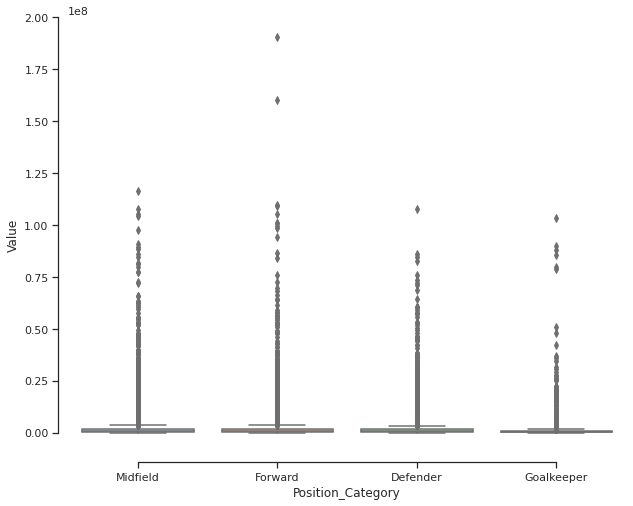

In [97]:
#Checking for outliers for each position category base on value each player makes
sns.set(style="ticks", palette="pastel")
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)

box2 = sns.boxplot(data = df_soccer, y = 'Value', x = 'Position_Category')
sns.despine(offset=10, trim=True)

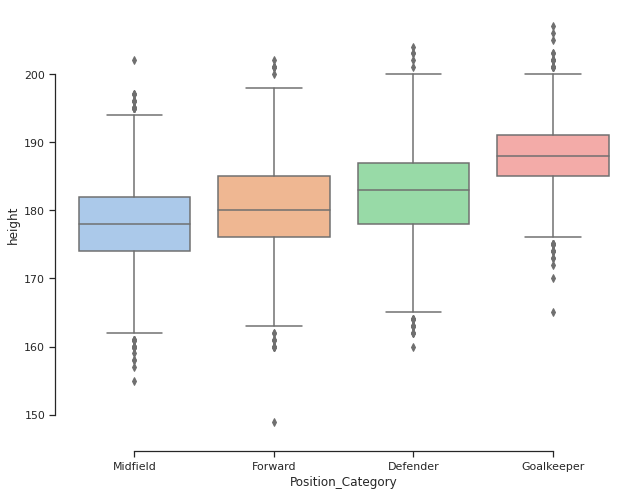

In [98]:
#Checking for outliers for each position category base on wage each player makes
sns.set(style="ticks", palette="pastel")
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)

box2 = sns.boxplot(data = df_soccer, y = 'height', x = 'Position_Category')
sns.despine(offset=10, trim=True)

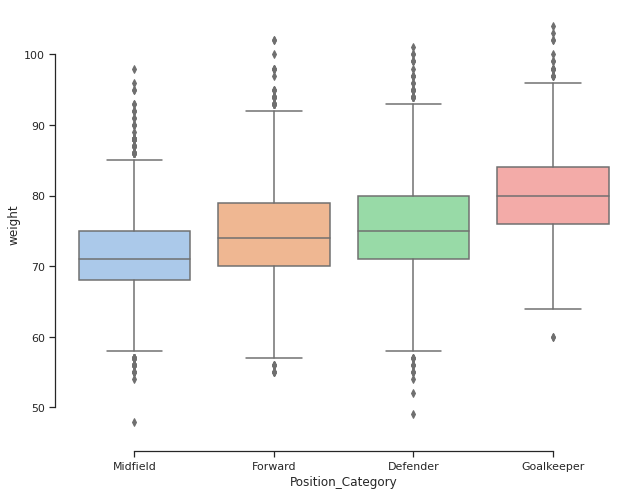

In [99]:
#Checking for outliers for each position category base on wage each player makes
sns.set(style="ticks", palette="pastel")
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)

box2 = sns.boxplot(data = df_soccer, y = 'weight', x = 'Position_Category')
sns.despine(offset=10, trim=True)

In [100]:
# identifying the skew of data
df_soccer.skew()

ID                         -3.889914
Age                         1.020471
Overall                     0.450520
Potential                   0.099491
Value                       8.056442
Wage                        7.022797
Total_Point                -0.418288
height                      0.012983
weight                      0.255327
crossing                   -0.402770
finishing                  -0.300241
heading_accuracy           -0.723498
short_passing              -0.825467
volleys                    -0.101901
acceleration               -1.120653
sprint_speed               -1.128853
agility                    -0.539128
reactions                   0.228246
balance                    -0.644901
dribbling                  -1.015776
curve                      -0.088145
fk_accuracy                 0.199087
long_passing               -0.308040
ball_control               -1.088979
shot_power                 -0.030738
jumping                    -0.268785
stamina                    -0.770892
s

In [101]:
df_soccer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17649 entries, 0 to 20088
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17649 non-null  int64  
 1   Name                      17649 non-null  object 
 2   Position                  17649 non-null  object 
 3   Age                       17649 non-null  int64  
 4   Overall                   17649 non-null  int64  
 5   Potential                 17649 non-null  int64  
 6   Team                      17438 non-null  object 
 7   Value                     17649 non-null  float64
 8   Wage                      17649 non-null  float64
 9   Total_Point               17649 non-null  int64  
 10  height                    17649 non-null  float64
 11  weight                    17649 non-null  float64
 12  crossing                  17649 non-null  int64  
 13  finishing                 17649 non-null  int64  
 14  headin

In [102]:
# getting the sorted percentages of the work rate
df_soccer['work_rate'].value_counts(sorted)

Medium/ Medium    0.578333
High/ Medium      0.155703
Medium/ High      0.077965
Medium/ Low       0.050144
High/ Low         0.040739
High/ High        0.039776
Low/ Medium       0.028444
Low/ High         0.021758
Low/ Low          0.004193
N/A/ N/A          0.002946
Name: work_rate, dtype: float64

Right    0.774548
Left     0.225452
Name: preferred_foot, dtype: float64

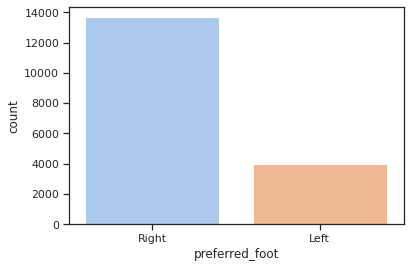

In [103]:
, normalize
#counting the players preferred foot  
sns.countplot(x = 'preferred_foot', data=df_soccer)
df_soccer['preferred_foot'].value_counts(normalize=True)
#df_soccer['preferred_foot'].value_counts()


In [104]:
df_soccer.groupby(['weak_foot', 'preferred_foot']).Overall.mean()

weak_foot  preferred_foot
1.0        Left              60.885714
           Right             58.205674
2.0        Left              63.019409
           Right             59.842140
3.0        Left              63.492809
           Right             62.036437
4.0        Left              67.031700
           Right             68.251940
5.0        Left              68.208333
           Right             69.596685
Name: Overall, dtype: float64

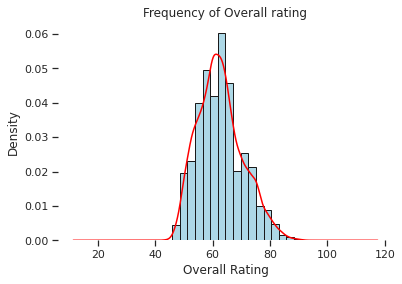

In [105]:
# getting the distribution of Overall rating
df_soccer['Overall'].hist(bins=20,
                          density=True,
                          edgecolor='k',
                          facecolor='lightblue',
                          )
plt.title('Frequency of Overall rating')
plt.xlabel('Overall Rating')
df_soccer['Overall'].plot.density(color = 'red')
plt.box(False)

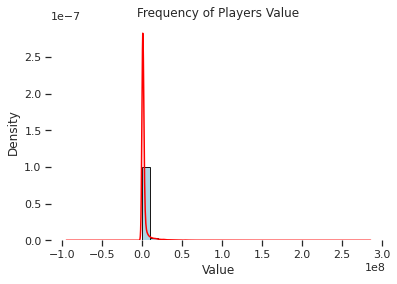

In [106]:
# getting the distribution of Player value
df_soccer['Value'].hist(bins=20,
                          density=True,
                          edgecolor='k',
                          facecolor='lightblue',
                          )
plt.title('Frequency of Players Value')
plt.xlabel('Value')
df_soccer['Value'].plot.density(color = 'red')
plt.box(False)

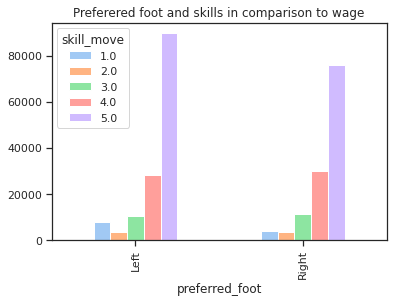

<Figure size 640x480 with 0 Axes>

In [107]:
df_soccer.groupby(['preferred_foot', 'skill_move'])['Wage'].mean().unstack().plot.bar()
plt.title('Preferered foot and skills in comparison to wage')
figure(figsize=(8,6), dpi=80)
plt.show()

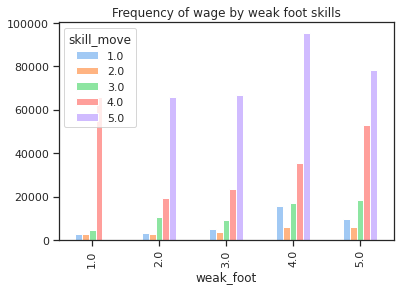

<Figure size 640x480 with 0 Axes>

In [108]:
df_soccer.groupby(['weak_foot', 'skill_move'])['Wage'].mean().unstack().plot.bar()
plt.title('Frequency of wage by weak foot skills')
figure(figsize=(8,6), dpi=80)
plt.show()

Text(0.5, 1.0, 'Frequency of Finishing for weak foot skills')

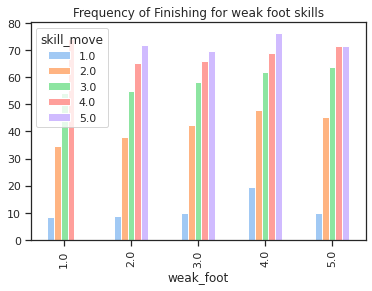

In [109]:
#Looking at finishing for weak foot and preferred foot 
df_soccer.groupby(['weak_foot', 'skill_move'])['finishing'].mean().unstack().plot.bar()
plt.title('Frequency of Finishing for weak foot skills')

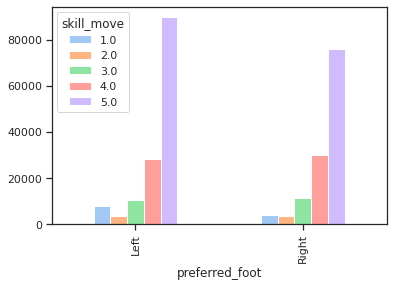

In [110]:
df_soccer.groupby(['preferred_foot', 'skill_move'])['Wage'].mean().unstack().plot.bar()


Text(0.5, 1.0, 'Weak foot comparison to overall outliers')

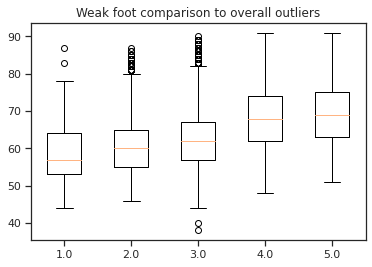

In [111]:
# Looking at outliers for weak_foot in comparison with overall 
x = df_soccer.groupby('weak_foot')['Overall'].apply(list)
_ = plt.boxplot(x=x.values, labels=x.index)
plt.title('Weak foot comparison to overall outliers')

Text(0.5, 1.0, 'Preferred foot comparison to overall outliers')

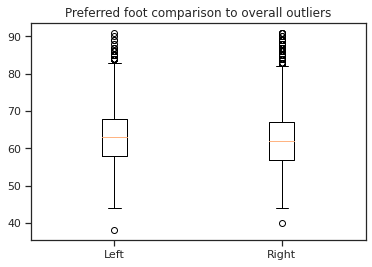

In [112]:
x = df_soccer.groupby('preferred_foot')['Overall'].apply(list)
_ = plt.boxplot(x=x.values, labels=x.index)
plt.title('Preferred foot comparison to overall outliers')

In [113]:
#list of columns

#target column: position

columns_to_normalize = ['Age', 'Overall', 'Potential', 'Value', 'Wage', 
                        'Total_Point', 'height', 'weight', 'crossing',
                        'finishing', 'heading_accuracy', 
                        'short_passing', 'short_passing',	'volleys',	
                        'acceleration', 'sprint_speed',	'agility', 'reactions',
                        'balance',	'dribbling', 'curve',	'fk_accuracy',	
                        'long_passing',	'ball_control', 'shot_power',
                        'jumping', 'stamina',	'strength',	'long_shots',	
                        'aggression', 'interception',	'positioning', 'vision',	
                        'penalties',	'composure',	'defensive_awareness',	
                        'standing_tackle',	'sliding_tackle',
                        'gk_diving',	'gk_handling',	'gk_kicking',	
                        'gk_positioning',	'gk_reflexes']

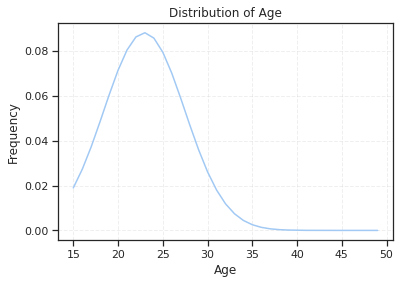

The skew of Age is 1.020470663538824


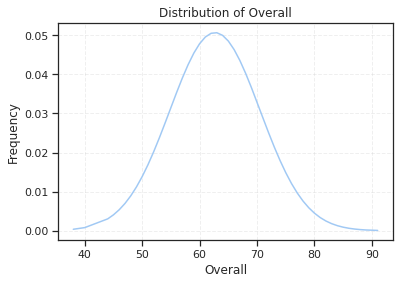

The skew of Overall is 0.450520481686464


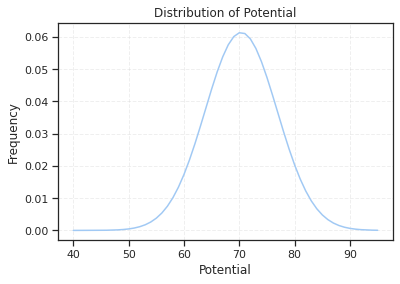

The skew of Potential is 0.0994908051108382


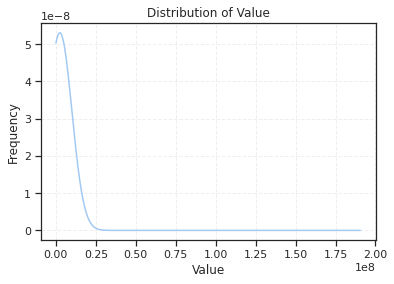

The skew of Value is 8.05644170601112


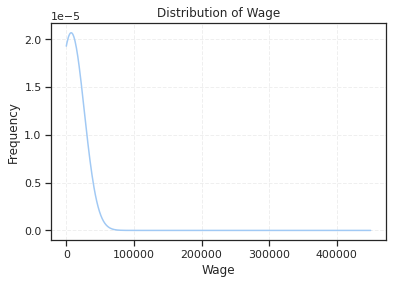

The skew of Wage is 7.022796933271626


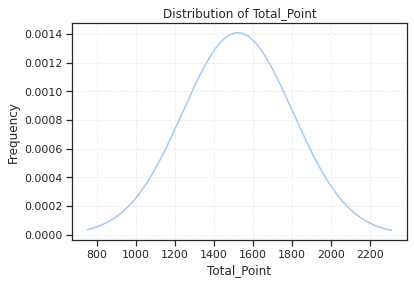

The skew of Total_Point is -0.41828848426063936


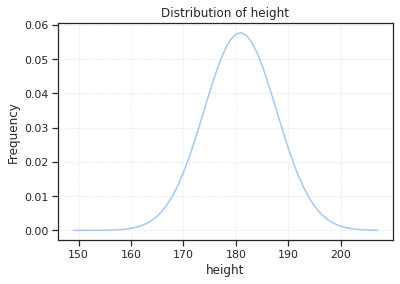

The skew of height is 0.0129834999039003


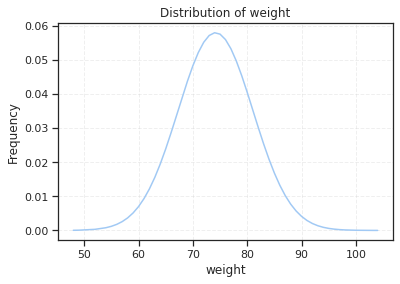

The skew of weight is 0.25532684797185684


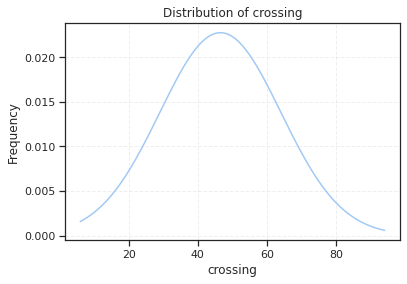

The skew of crossing is -0.40276980680783714


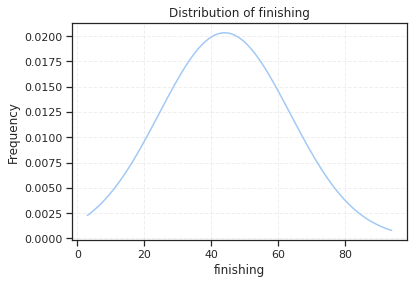

The skew of finishing is -0.3002405781188418


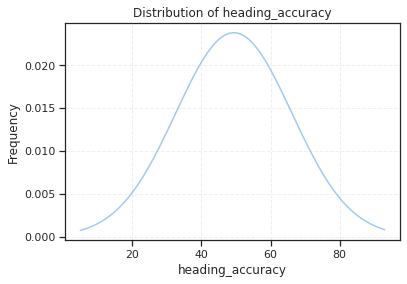

The skew of heading_accuracy is -0.7234980359477863


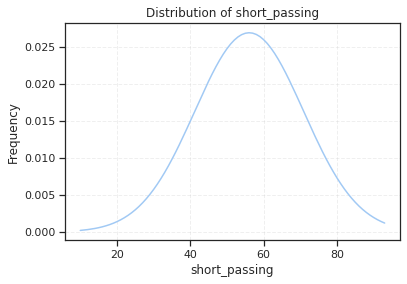

The skew of short_passing is -0.8254666624425891


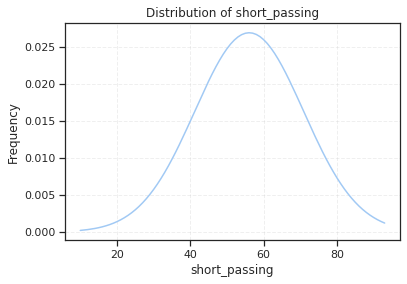

The skew of short_passing is -0.8254666624425891


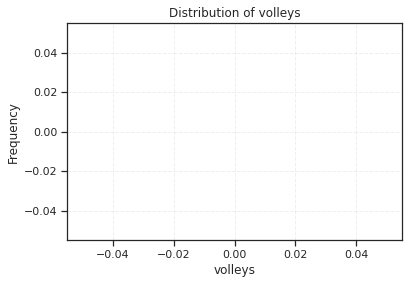

The skew of volleys is -0.10190095590053794


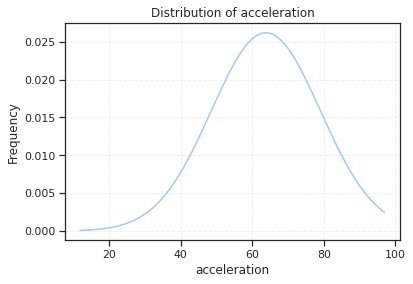

The skew of acceleration is -1.120652586099241


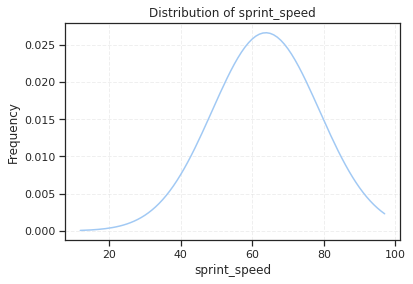

The skew of sprint_speed is -1.1288525269737024


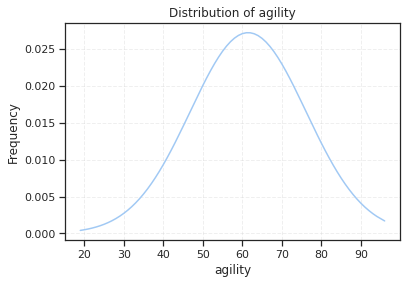

The skew of agility is -0.5391280441832637


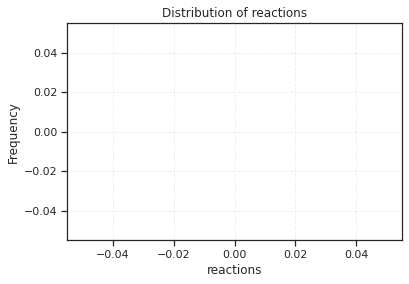

The skew of reactions is 0.22824609732511844


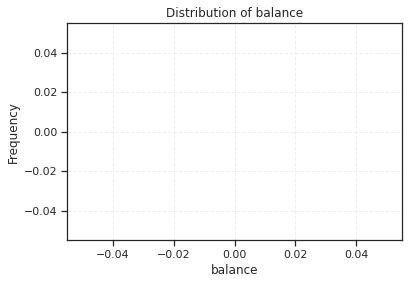

The skew of balance is -0.6449007305795806


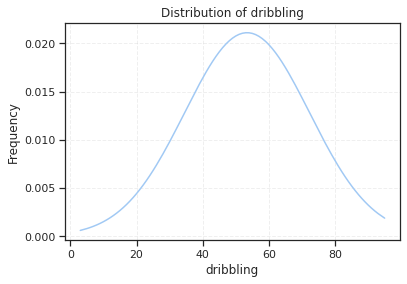

The skew of dribbling is -1.015776439648717


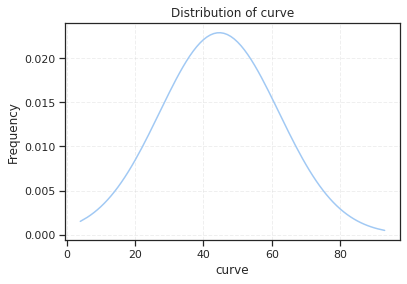

The skew of curve is -0.08814481491549682


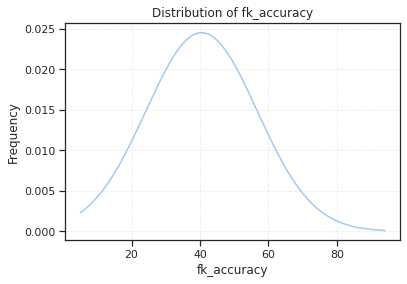

The skew of fk_accuracy is 0.19908744958956656


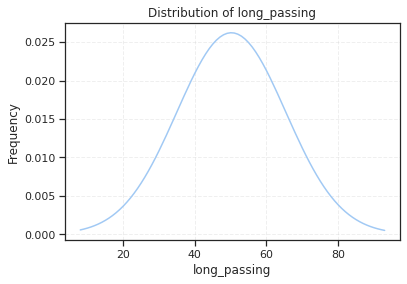

The skew of long_passing is -0.3080402765941471


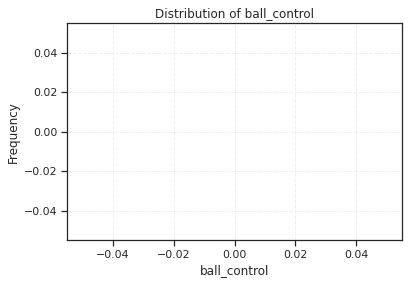

The skew of ball_control is -1.0889787674812708


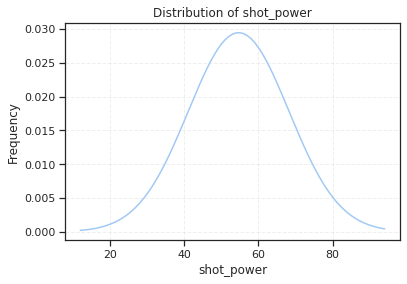

The skew of shot_power is -0.03073793410817795


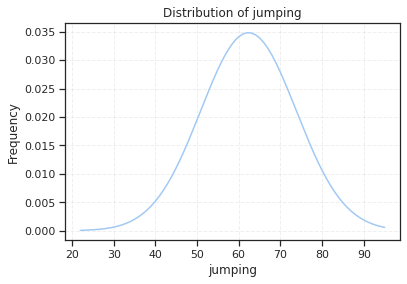

The skew of jumping is -0.26878522565010177


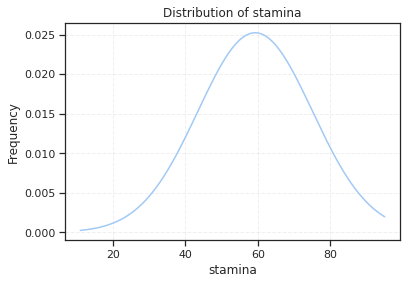

The skew of stamina is -0.7708924448396289


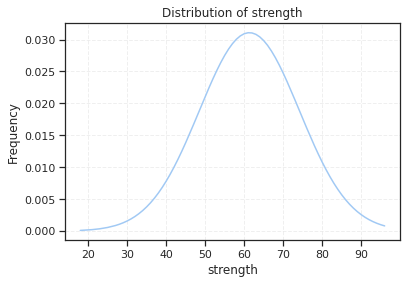

The skew of strength is -0.1458716832660624


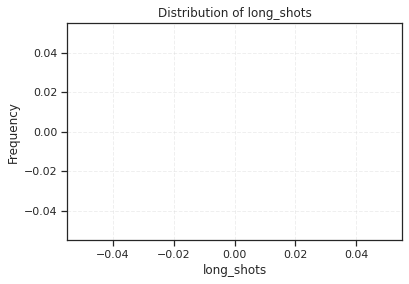

The skew of long_shots is -0.2889362750987477


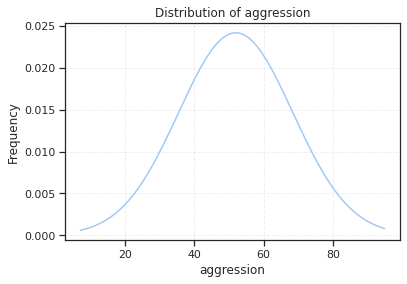

The skew of aggression is -0.22415951154546285


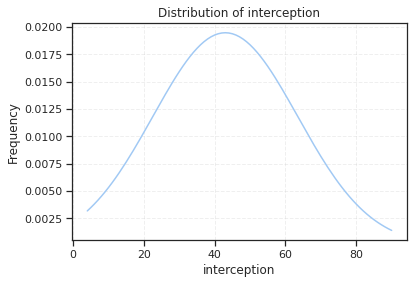

The skew of interception is -0.16091675660815638


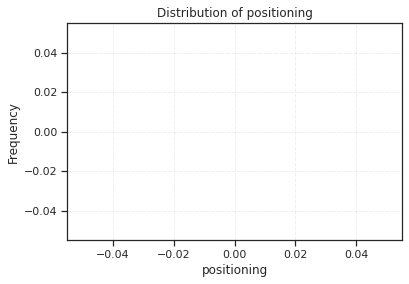

The skew of positioning is -0.7144488931217275


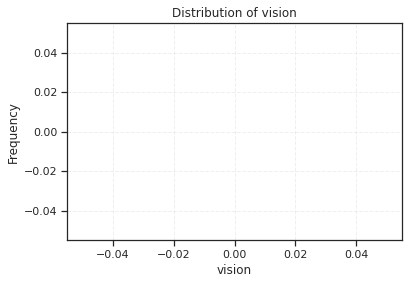

The skew of vision is -0.021739844214561686


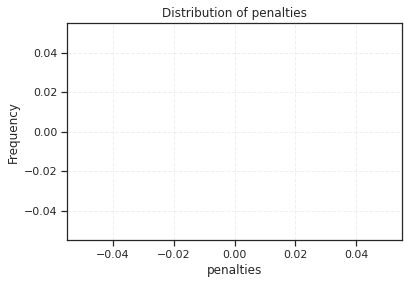

The skew of penalties is -0.33069302029153846


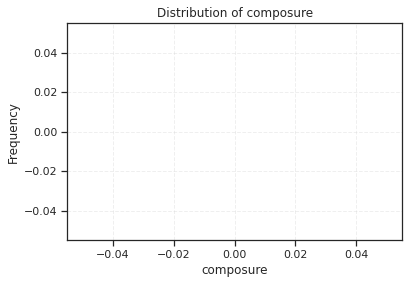

The skew of composure is -0.0042708404665450376


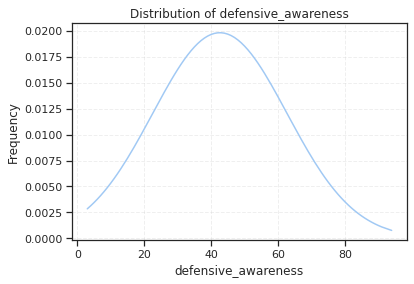

The skew of defensive_awareness is -0.21604488629945848


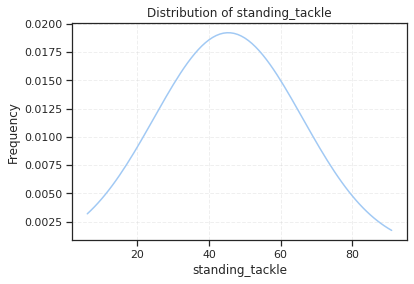

The skew of standing_tackle is -0.2686782760189486


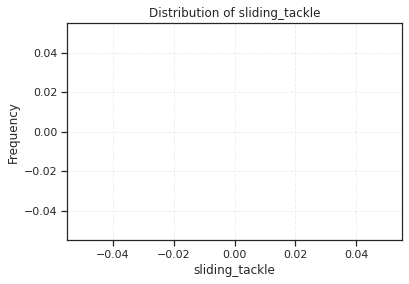

The skew of sliding_tackle is -0.22810681961636706


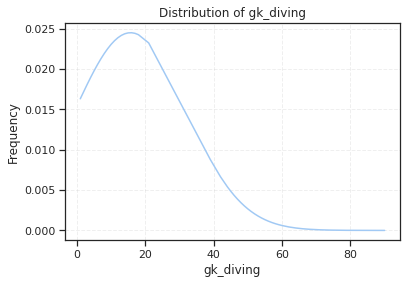

The skew of gk_diving is 2.5150640877026844


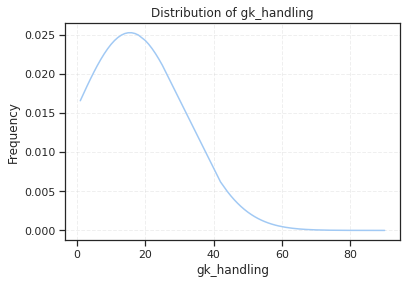

The skew of gk_handling is 2.497655202746371


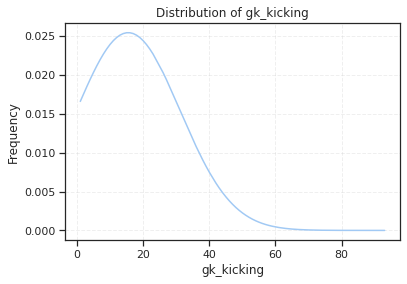

The skew of gk_kicking is 2.4755265086574156


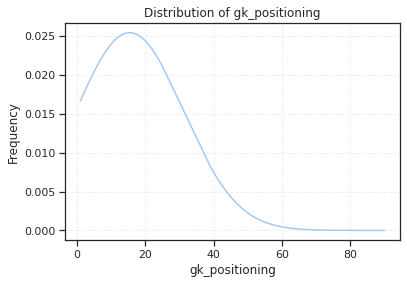

The skew of gk_positioning is 2.542290455601347


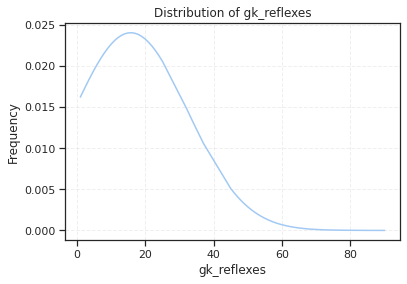

The skew of gk_reflexes is 2.526870595297117


In [114]:
#source: https://stackoverflow.com/questions/71287607/how-to-make-a-normal-
#distribution-graph-from-data-frame-in-python


for arr1 in columns_to_normalize:
  mean = statistics.mean(df_soccer[arr1])
  sd = statistics.stdev(df_soccer[arr1])
  
  # Calculating probability density function (PDF)
  pdf = stats.norm.pdf(df_soccer[arr1].sort_values(), mean, sd)

  # Drawing a graph
  plt.plot(df_soccer[arr1].sort_values(), pdf)
  #plt.xlim([-30,250])  
  plt.title("Distribution of " + arr1, size = 12)
  plt.xlabel(arr1, size=12)    
  plt.ylabel("Frequency", size=12)                
  plt.grid(True, alpha=0.3, linestyle="--")
  plt.show()

  print("The skew of " + arr1 + " is " + str(df_soccer[arr1].skew()))

## Feature Engineering

In [115]:
#Drop Columns because they do not have useful information
df_soccer.drop(['Name', 'Team', 'Total_Point', 'Position'], axis = 1, inplace = True )

In [116]:
#Data Dimension after dropping non-significant variables for modeling
df_soccer.shape

(17649, 49)

In [117]:
#getting column names
for col in df_soccer.columns:
  print(col)

ID
Age
Overall
Potential
Value
Wage
height
weight
crossing
finishing
heading_accuracy
short_passing
volleys
acceleration
sprint_speed
agility
reactions
balance
dribbling
curve
fk_accuracy
long_passing
ball_control
shot_power
jumping
stamina
strength
long_shots
aggression
interception
positioning
vision
penalties
composure
defensive_awareness
standing_tackle
sliding_tackle
gk_diving
gk_handling
gk_kicking
gk_positioning
gk_reflexes
preferred_foot
weak_foot
skill_move
international_reputation
work_rate
body_type
Position_Category


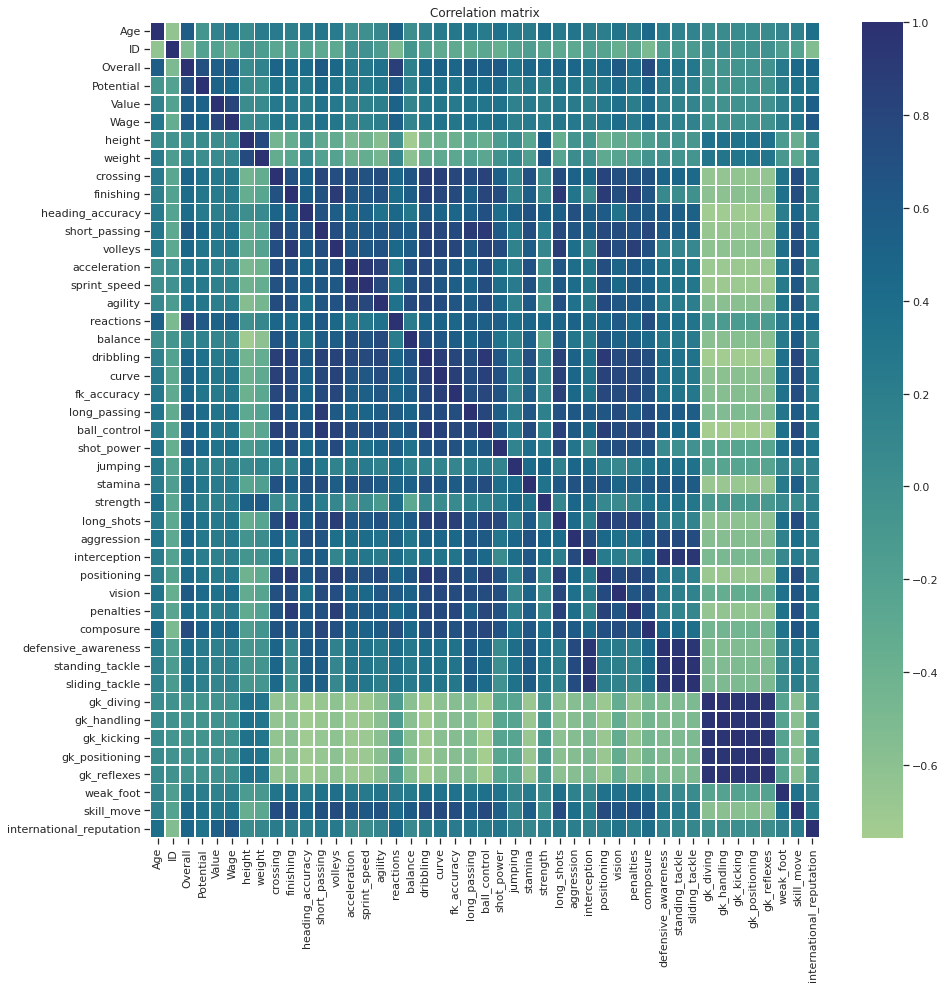

In [118]:
#Correlation Matrix for all numeric attributes
L = [1] + [0] + list(range(2,49))
df_corr = df_soccer.iloc[:, L]
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
ax = sns.heatmap(df_corr.corr(), linewidth=.5, cmap = 'crest').set_title('Correlation matrix')

In [119]:
#Highly correlated features with overall
df_overall = df_corr.corr()
#high correlation attributes
df_overall[df_overall['long_shots']>=0.5]

,Age,ID,Overall,Potential,Value,Wage,height,weight,crossing,finishing,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,weak_foot,skill_move,international_reputation
crossing,0.251675,-0.260995,0.491551,0.331537,0.267144,0.298809,-0.446355,-0.335336,1.000000,0.685457,...,0.458313,0.440557,-0.642512,-0.641350,-0.633988,-0.639446,-0.641474,0.319012,0.713109,0.226340
finishing,0.193758,-0.202262,0.409074,0.289290,0.240382,0.253415,-0.348919,-0.247586,0.685457,1.000000,...,0.034644,-0.002892,-0.600391,-0.598803,-0.591661,-0.595015,-0.597855,0.363693,0.719803,0.190334
heading_accuracy,0.243219,-0.212642,0.409269,0.262771,0.199407,0.234645,0.017155,0.071457,0.498287,0.535044,...,0.550189,0.527015,-0.727763,-0.724910,-0.718870,-0.721632,-0.726252,0.219279,0.459342,0.178848
short_passing,0.290282,-0.284954,0.600461,0.444282,0.329772,0.356659,-0.301695,-0.207320,0.792796,0.689404,...,0.560852,0.532575,-0.671114,-0.669276,-0.661067,-0.664275,-0.669092,0.335503,0.678410,0.265770
volleys,0.239747,-0.277783,0.447104,0.309425,0.266733,0.297715,-0.322901,-0.220853,0.714916,0.904333,...,0.120700,0.086382,-0.609473,-0.607379,-0.607562,-0.603704,-0.608233,0.369309,0.739628,0.258800
acceleration,-0.010707,-0.012001,0.269543,0.260064,0.170238,0.147343,-0.487060,-0.409358,0.714464,0.650482,...,0.299608,0.284475,-0.699010,-0.700331,-0.694290,-0.693137,-0.697462,0.271838,0.645274,0.037360
sprint_speed,-0.001315,-0.011694,0.282606,0.265338,0.178734,0.156698,-0.406896,-0.339033,0.686716,0.635430,...,0.313485,0.296709,-0.702745,-0.704160,-0.698016,-0.698270,-0.702289,0.263427,0.620400,0.038480
agility,0.084223,-0.130108,0.349141,0.296279,0.206393,0.203851,-0.555568,-0.458097,0.739722,0.685665,...,0.229628,0.210140,-0.584155,-0.585390,-0.578985,-0.579086,-0.583153,0.315220,0.677671,0.116259
balance,0.014294,-0.070015,0.181795,0.165484,0.131402,0.129700,-0.731113,-0.602440,0.650442,0.565403,...,0.255159,0.247616,-0.580614,-0.579254,-0.577390,-0.573655,-0.578059,0.256079,0.579902,0.070766
dribbling,0.166508,-0.195227,0.461269,0.363650,0.264326,0.282164,-0.440505,-0.342294,0.862869,0.846669,...,0.353139,0.328404,-0.741900,-0.741215,-0.733462,-0.735985,-0.739844,0.362935,0.776167,0.191941


In [120]:
# Moderate correlation attributes
df_overall[(df_overall['Overall'] >= 0.4) & (df_overall['Overall'] < 0.5)]

,Age,ID,Overall,Potential,Value,Wage,height,weight,crossing,finishing,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,weak_foot,skill_move,international_reputation
crossing,0.251675,-0.260995,0.491551,0.331537,0.267144,0.298809,-0.446355,-0.335336,1.000000,0.685457,...,0.458313,0.440557,-0.642512,-0.641350,-0.633988,-0.639446,-0.641474,0.319012,0.713109,0.226340
finishing,0.193758,-0.202262,0.409074,0.289290,0.240382,0.253415,-0.348919,-0.247586,0.685457,1.000000,...,0.034644,-0.002892,-0.600391,-0.598803,-0.591661,-0.595015,-0.597855,0.363693,0.719803,0.190334
heading_accuracy,0.243219,-0.212642,0.409269,0.262771,0.199407,0.234645,0.017155,0.071457,0.498287,0.535044,...,0.550189,0.527015,-0.727763,-0.724910,-0.718870,-0.721632,-0.726252,0.219279,0.459342,0.178848
volleys,0.239747,-0.277783,0.447104,0.309425,0.266733,0.297715,-0.322901,-0.220853,0.714916,0.904333,...,0.120700,0.086382,-0.609473,-0.607379,-0.607562,-0.603704,-0.608233,0.369309,0.739628,0.258800
dribbling,0.166508,-0.195227,0.461269,0.363650,0.264326,0.282164,-0.440505,-0.342294,0.862869,0.846669,...,0.353139,0.328404,-0.741900,-0.741215,-0.733462,-0.735985,-0.739844,0.362935,0.776167,0.191941
fk_accuracy,0.286299,-0.299542,0.470193,0.305653,0.257695,0.293175,-0.386869,-0.271137,0.786522,0.760018,...,0.315470,0.286266,-0.566420,-0.564504,-0.554270,-0.561579,-0.564872,0.357554,0.713807,0.250572
stamina,0.230706,-0.149894,0.459009,0.279950,0.246379,0.239619,-0.245277,-0.159927,0.672294,0.550017,...,0.609108,0.581165,-0.687142,-0.687470,-0.680044,-0.681328,-0.685646,0.256512,0.553782,0.109969
strength,0.380974,-0.257089,0.433349,0.192447,0.192799,0.218492,0.526567,0.615538,0.042499,0.075279,...,0.313988,0.288574,-0.099660,-0.100810,-0.105065,-0.098187,-0.099988,0.067915,0.055143,0.170756
long_shots,0.264095,-0.276372,0.477742,0.317834,0.266168,0.292768,-0.354851,-0.241080,0.745271,0.915522,...,0.184987,0.147105,-0.604021,-0.601381,-0.599921,-0.596595,-0.601030,0.374770,0.733515,0.228575
aggression,0.310908,-0.285239,0.463104,0.279878,0.233896,0.272437,-0.043624,0.033473,0.517494,0.301823,...,0.754448,0.735624,-0.561301,-0.559278,-0.554984,-0.556840,-0.559520,0.173180,0.378958,0.206644


In [121]:
#Position Category unique columns
df_soccer['Position_Category'].unique()

array(['Midfield', 'Forward', 'Defender', 'Goalkeeper'], dtype=object)

In [122]:
#Converting categorical to numerical columns
position_category = {
    'Midfield':0,
    'Forward': 1,
    'Defender': 2,
    'Goalkeeper': 3
}

df_soccer['Position_Category'] = df_soccer['Position_Category'].map(position_category)

In [123]:
# Label encode the preferred foot to make it numerical
le = LabelEncoder()

df_soccer['preferred_foot'] = le.fit_transform(df_soccer['preferred_foot'])
df_soccer['preferred_foot'].head()

0    1
1    0
2    1
3    1
4    1
Name: preferred_foot, dtype: int64

In [124]:
# Label encoding 

In [125]:
# Check unique counts
df_soccer['body_type'].value_counts() #to do pm

Normal (170-185)    6314
Lean (170-185)      3965
Normal (185+)       3360
Lean (185+)         1874
Normal (170-)        706
Lean (170-)          527
Stocky (170-185)     428
Stocky (185+)        258
Unique               116
Stocky (170-)         80
ID808                  1
ID137251               1
ID139252               1
ID763                  1
ID28249                1
ID3934                 1
ID5860                 1
ID10953                1
ID102249               1
ID113546               1
ID184033               1
ID41009                1
ID147442               1
ID167533               1
ID184604               1
ID191129               1
ID164945               1
ID13850                1
ID977                  1
ID178586               1
ID499                  1
Name: body_type, dtype: int64

In [126]:
#keep only words, not numbers in parenthesis
body_type = []

for row in df_soccer['body_type']:
  bodytype = re.sub("[\(\[].*?[\)\]]", "", row)
  body_type.append(bodytype)



In [127]:
df_soccer['body_type_clean'] = body_type

In [128]:
df_soccer.shape[0]

17649

In [129]:
df_soccer = df_soccer[~df_soccer['body_type_clean'].str.contains("ID")]

In [130]:
df_soccer['body_type_clean'].value_counts()

Normal     10380
Lean        6366
Stocky       766
Unique       116
Name: body_type_clean, dtype: int64

In [131]:
df_soccer.shape[0]

17628

In [132]:
# Label encode the body_type_clean
le = LabelEncoder()

df_soccer['body_type_clean'] = le.fit_transform(df_soccer['body_type_clean'])
df_soccer['body_type_clean'].head()

0    0
1    1
2    1
3    0
4    0
Name: body_type_clean, dtype: int64

In [133]:
df_soccer.head()

,ID,Age,Overall,Potential,Value,Wage,height,weight,crossing,finishing,...,gk_positioning,gk_reflexes,preferred_foot,weak_foot,skill_move,international_reputation,work_rate,body_type,Position_Category,body_type_clean
0,261188,22,71,81,4200000.0,16000.0,180.0,70.0,52,72,...,15,8,1,3.0,4.0,1.0,Medium/ High,Lean (170-185),0,0
1,240833,17,71,89,4700000.0,6000.0,175.0,73.0,44,76,...,10,13,0,4.0,4.0,1.0,Medium/ Low,Normal (170-185),1,1
2,183569,33,75,75,3600000.0,50000.0,191.0,90.0,65,74,...,16,6,1,4.0,3.0,2.0,High/ Medium,Normal (185+),1,1
3,236524,23,72,82,4900000.0,16000.0,195.0,84.0,45,26,...,11,9,1,3.0,2.0,1.0,Medium/ Medium,Lean (185+),2,0
4,256790,19,82,91,66000000.0,43000.0,184.0,72.0,66,76,...,8,11,1,4.0,5.0,1.0,Medium/ Medium,Lean (170-185),0,0


In [134]:
df_soccer['work_rate'].unique()

array(['Medium/ High', 'Medium/ Low', 'High/ Medium', 'Medium/ Medium',
       'High/ High', 'Low/ Medium', 'High/ Low', 'Low/ Low', 'Low/ High',
       'N/A/ N/A'], dtype=object)

In [135]:
# getting the sorted percentages of the work rate
df_soccer['work_rate'].value_counts(sorted)

Medium/ Medium    0.579022
High/ Medium      0.155888
Medium/ High      0.078058
Medium/ Low       0.050204
High/ Low         0.040787
High/ High        0.039823
Low/ Medium       0.028477
Low/ High         0.021784
Low/ Low          0.004198
N/A/ N/A          0.001759
Name: work_rate, dtype: float64

In [136]:
df_soccer['work_rate'].head(10)

0      Medium/ High
1       Medium/ Low
2      High/ Medium
3    Medium/ Medium
4    Medium/ Medium
5        High/ High
6    Medium/ Medium
7      High/ Medium
8      High/ Medium
9      High/ Medium
Name: work_rate, dtype: object

In [137]:
# label encoding the work rate and body type column  ---to do ks
# label encode work rate
df_soccer['work_rate'] = le.fit_transform(df_soccer['work_rate'])
df_soccer['work_rate'].head()

0    6
1    7
2    2
3    8
4    8
Name: work_rate, dtype: int64

In [138]:
# check the counts of the work rate
df_soccer['work_rate'].value_counts()

8    10207
2     2748
6     1376
7      885
1      719
0      702
5      502
3      384
4       74
9       31
Name: work_rate, dtype: int64

In [139]:
df_soccer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17628 entries, 0 to 20088
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17628 non-null  int64  
 1   Age                       17628 non-null  int64  
 2   Overall                   17628 non-null  int64  
 3   Potential                 17628 non-null  int64  
 4   Value                     17628 non-null  float64
 5   Wage                      17628 non-null  float64
 6   height                    17628 non-null  float64
 7   weight                    17628 non-null  float64
 8   crossing                  17628 non-null  int64  
 9   finishing                 17628 non-null  int64  
 10  heading_accuracy          17628 non-null  int64  
 11  short_passing             17628 non-null  int64  
 12  volleys                   17616 non-null  float64
 13  acceleration              17628 non-null  int64  
 14  sprint

In [140]:
df_soccer = df_soccer.drop(['body_type'],axis=1)

In [141]:
df_soccer.head(4)

,ID,Age,Overall,Potential,Value,Wage,height,weight,crossing,finishing,...,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,weak_foot,skill_move,international_reputation,work_rate,Position_Category,body_type_clean
0,261188,22,71,81,4200000.0,16000.0,180.0,70.0,52,72,...,7,15,8,1,3.0,4.0,1.0,6,0,0
1,240833,17,71,89,4700000.0,6000.0,175.0,73.0,44,76,...,11,10,13,0,4.0,4.0,1.0,7,1,1
2,183569,33,75,75,3600000.0,50000.0,191.0,90.0,65,74,...,9,16,6,1,4.0,3.0,2.0,2,1,1
3,236524,23,72,82,4900000.0,16000.0,195.0,84.0,45,26,...,8,11,9,1,3.0,2.0,1.0,8,2,0


In [142]:
#writing cleaned data to file for modeling
df_soccer.to_csv('fifa_data_cleaned.csv', index = None)
print(f'\nRow Count: {df_soccer.shape[0]}')


Row Count: 17628


In [143]:
#Base models

In [144]:
#Train test split